In [144]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import matplotlib

In [184]:
fto = '/storage/experiments/2023/10_airds04_prototype/0.TXT' #  File to Open
fto = '/storage/experiments/2023/1126_AIRDOS04_P3/0.TXT'
fto = '/storage/experiments/2023/1126_AIRDOS04_P3/1.TXT'
fto = '/storage/experiments/2023/12_AIRDOS04_P3_mraz/0.TXT'
fto = '/storage/experiments/2023/12_AIRDOS04/AIRDOS04_0074_in_0038/0.TXT'

l=[]
l.extend(range(0,1033))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn1 = df.loc[df[0]=='$DOS'].iloc[0,6]
print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

S.N.:  ffffffffffffffffffffffffffffffff


Text(0, 0.5, 'Counts [-]')

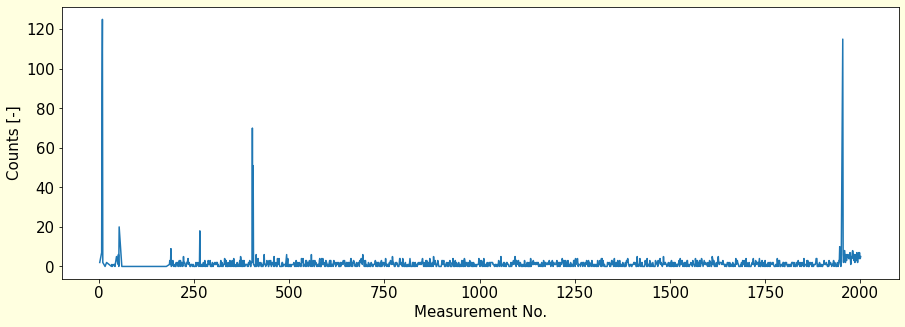

In [185]:
FIRST_CHANNEL = 12
df['sum'] = df.iloc[:,FIRST_CHANNEL:-10].sum(axis=1)

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['sum'])
plt.xlabel('Measurement No.')
plt.ylabel('Counts [-]')


In [167]:
df.iloc[:,5:]

,5,6,7,8,9,10,11,12,13,14,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,sum
1,-27,938,938.0,22.95,255.0,255.0,255.0,64.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2,-35,938,938.0,23.05,255.0,255.0,255.0,30.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
3,-39,938,938.0,23.05,255.0,255.0,255.0,77.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0
4,-43,938,938.0,23.15,255.0,255.0,255.0,66.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0
5,-44,938,938.0,23.25,255.0,255.0,255.0,44.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,-38,516,936.0,21.15,255.0,255.0,255.0,57.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0
6759,-38,516,936.0,21.15,255.0,255.0,255.0,51.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
6760,-38,516,936.0,21.15,255.0,255.0,255.0,54.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0
6761,-37,516,936.0,21.15,255.0,255.0,255.0,100.0,51.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241.0


0.045 0.015


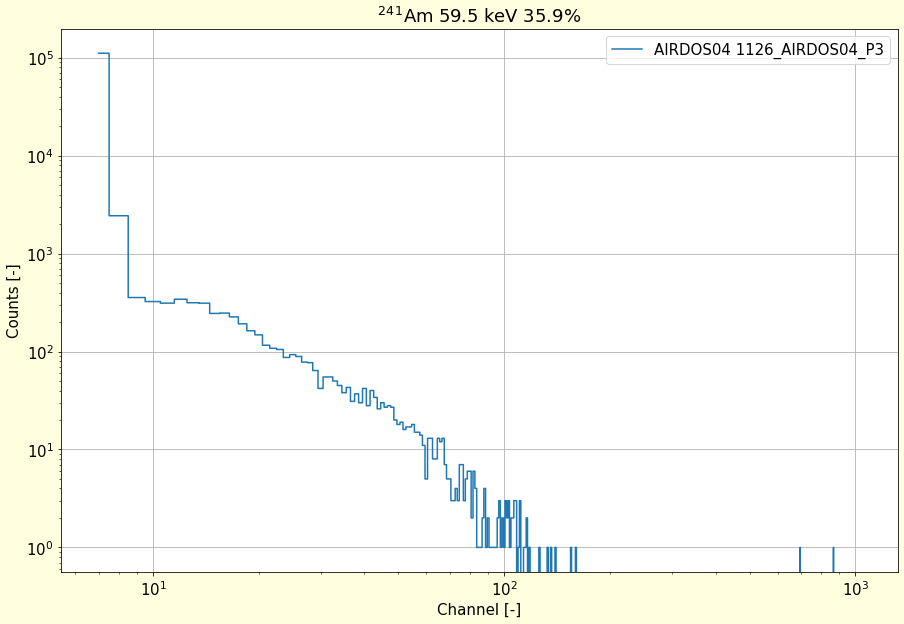

In [74]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

FIRST_CHANNEL = 7

rcc = df.apply(pd.to_numeric, downcast='float', errors='coerce')

rcc = rcc.iloc[:-10]

ener = rcc.iloc[:,FIRST_CHANNEL:1028].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e1 = pd.DataFrame()
e1['1'] = ener
e1['i'] = ener.index
#e1['x'] = (e1['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

#plt.plot(e1['x'], e1['1'] * 1.1/ coef2[1], label='LABDOS '+fto.split('/')[-2], drawstyle='steps-mid')
plt.plot(e1['i'], e1['1'], label='AIRDOS04 '+fto.split('/')[-2], drawstyle='steps-mid')

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('$^2$$^4$$^1$Am 59.5 keV 35.9%')
plt.xlabel('Channel [-]')
plt.ylabel('Counts [-]')
plt.grid()

In [140]:
fto = '/storage/stations/LS/eee/airdos04/airdos04.csv.2023-11-05_18' #  File to Open
fto = '/storage/stations/LS/eee/airdos04/airdos04.csv.2023-11-11_15' #  File to Open
fto = '/storage/stations/LS/eee/airdos04/airdos04.csv.2023-12-04_15'

l=[]
l.extend(range(0,1029))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
#sn1 = df.loc[df[0]=='$DOS'].iloc[0,6]
#print("S.N.: ", sn1)
df = df.loc[df[1]=='$HIST']
df['time'] = pd.to_datetime(df[0],unit='s')
df.set_index('time', inplace=True)

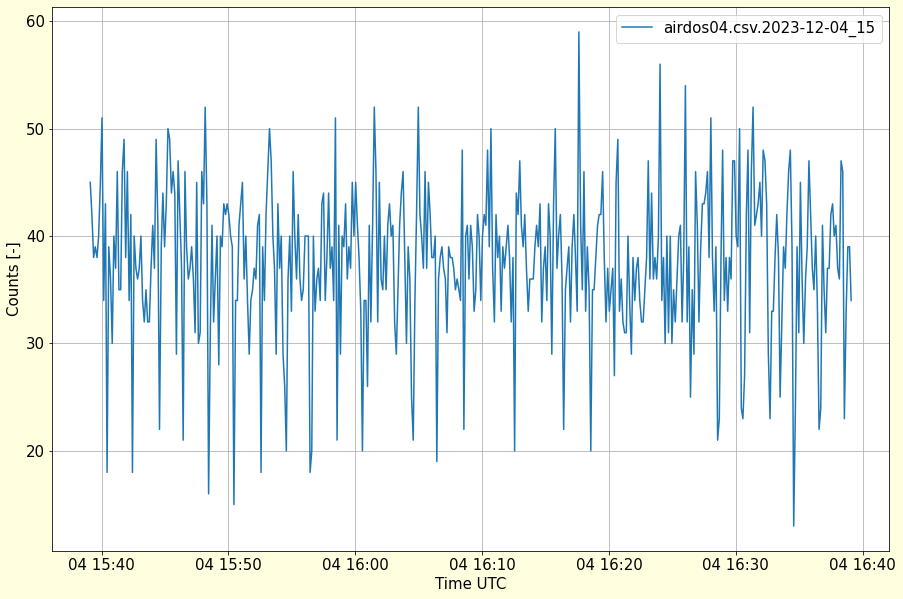

In [141]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

df['sum'] = df.iloc[:,13:1000].sum(axis=1)
plt.plot(df['sum'], label=fto.split('/')[-1])

plt.xlabel('Time UTC')
plt.ylabel('Counts [-]')

plt.legend()
plt.grid()

In [136]:
df.iloc[200:240,:50]
df.iloc[224,0] - df.iloc[209,0]

119.51999998092651

0.045 0.015


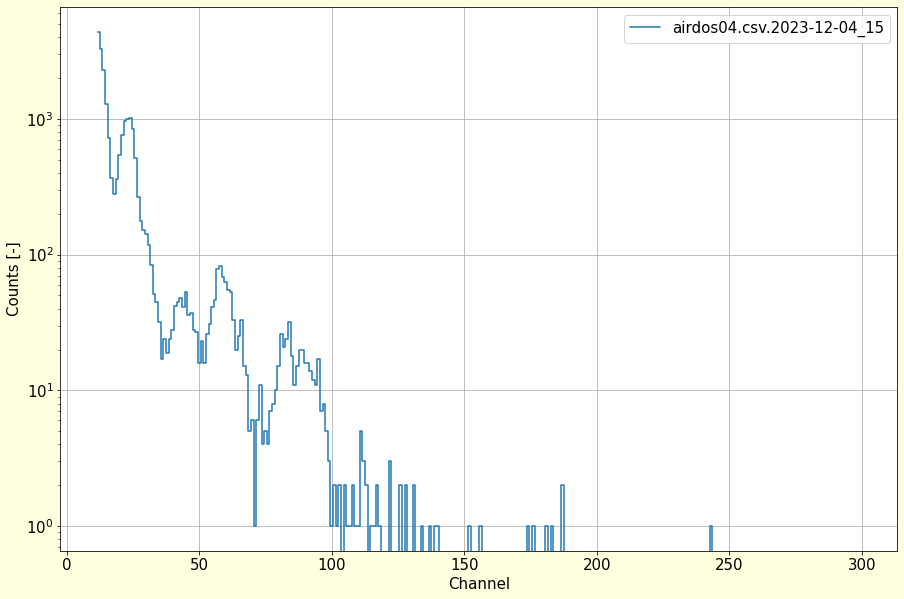

In [142]:
plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

FIRST_CHANNEL = 12

rcc = df

ener = rcc.iloc[:,FIRST_CHANNEL:300].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e1 = pd.DataFrame()
e1['1'] = ener
e1['i'] = ener.index
e1['x'] = (e1['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

#plt.plot(e1['x'], e1['1'] * 1.1/ coef2[1], label='LABDOS '+fto.split('/')[-2], drawstyle='steps-mid')
plt.plot(e1['i'], e1['1'], label=fto.split('/')[-1], drawstyle='steps-mid')

plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts [-]')
plt.grid()

0.045 0.015
0.045 0.015


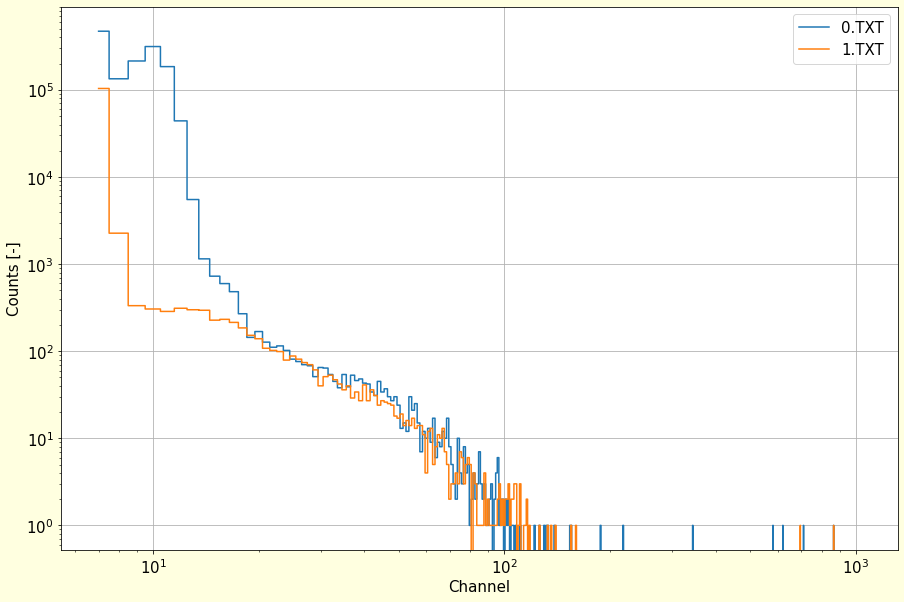

In [84]:
fto = '/storage/stations/LS/eee/airdos04/airdos04.csv.2023-10-25_08' #  File to Open
fto = '/storage/experiments/2023/1126_AIRDOS04_P3/0.TXT'

l=[]
l.extend(range(0,1029))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
#sn1 = df.loc[df[0]=='$DOS'].iloc[0,6]
#print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

plt.figure(figsize=(15,10), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

FIRST_CHANNEL = 7

rcc = df.iloc[:3000]

ener = rcc.iloc[:,FIRST_CHANNEL:1027].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e1 = pd.DataFrame()
e1['1'] = ener
e1['i'] = ener.index
e1['x'] = (e1['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

#plt.plot(e1['x'], e1['1'] * 1.1/ coef2[1], label='LABDOS '+fto.split('/')[-2], drawstyle='steps-mid')
plt.plot(e1['i'], e1['1'], label=fto.split('/')[-1], drawstyle='steps-mid')

fto = '/storage/stations/LS/eee/airdos04/airdos04.csv.2023-11-06_15' #  File to Open
fto = '/storage/experiments/2023/1126_AIRDOS04_P3/1.TXT'

l=[]
l.extend(range(0,1029))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
#sn1 = df.loc[df[0]=='$DOS'].iloc[0,6]
#print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

FIRST_CHANNEL = 7

rcc = df.iloc[:3000]

ener = rcc.iloc[:,FIRST_CHANNEL:1027].sum()

coef2 = np.array([0.,0.])
coef2[1] = 0.015
coef2[0] = 0.015*3

print (coef2[0], coef2[1])

e1 = pd.DataFrame()
e1['1'] = ener
e1['i'] = ener.index
e1['x'] = (e1['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

plt.plot(e1['i'], e1['1'], label=fto.split('/')[-1], drawstyle='steps-mid')


plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Counts [-]')
plt.grid()

In [85]:
df.iloc[:,6:]

,6,7,8,9,10,11,12,13,14,15,...,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028
1,255,80.0,8.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,255,46.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,255,34.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,255,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,255,24.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,255,28.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3237,255,54.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3238,255,34.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3239,255,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
